In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.shape

(768, 9)

In [21]:
print(df.isna().sum(),'\n\n', df.duplicated().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 

 0


In [12]:
#memisahkan data fitur dan target
x = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [41]:
#training testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
#standarisasi fitur / normalisasi
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.4, random_state = 42, stratify = y)

In [55]:
#oversampling dengan smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [60]:
#Evaluasi KNNNNNNNNNNNNNNNNN untuk berbagai nilai k
from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(1, 9) #array isinya nilai uji jumlah tetangga k
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors): #menghitung akurasi model untuk data pengujian
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)

    train_accuracy[i] = knn.score(x_train_resampled , y_train_resampled)
    test_accuracy[i] = knn.score(x_test, y_test)

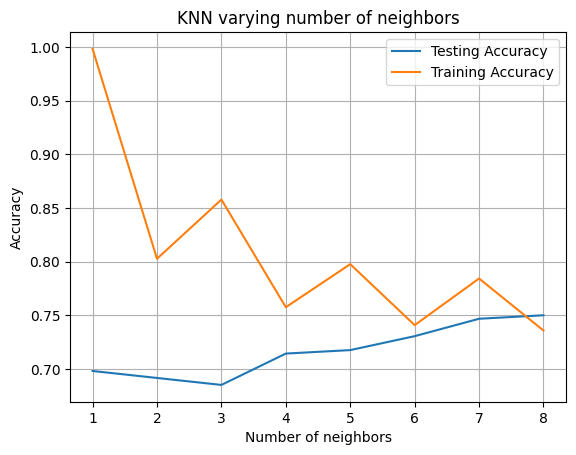

In [62]:
#VISUALLLLLLIIIIIISASIIIIIIIIIIII

plt.title('KNN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [98]:
optimal_k = 8
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train_resampled, y_train_resampled)
test_score = knn.score(x_test, y_test)
print(f'Test accuracy with k: {optimal_k} : {test_score:.2f}')

Test accuracy with k: 8 : 0.71


In [90]:
#evaluasi model dengan confusion matrix dan classification report
# from sklearn.metrics import confusion_matrix 

# y_pred = knn.predict(x_test)
# print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
# print('Classification Report: ', classification_report(y_test, y_pred))

# from sklearn.metrics import roc_auc_score
# roc_auc_score = 

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [91]:
knn.score(x_test, y_test)

0.75

In [100]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[151,  50],
       [ 39,  68]])

In [101]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,151,50,201
1,39,68,107
All,190,118,308


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       201
           1       0.58      0.64      0.60       107

    accuracy                           0.71       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.72      0.71      0.71       308



In [103]:
y_pred_proba = knn.predict_proba(x_test)[:, 1]

In [105]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

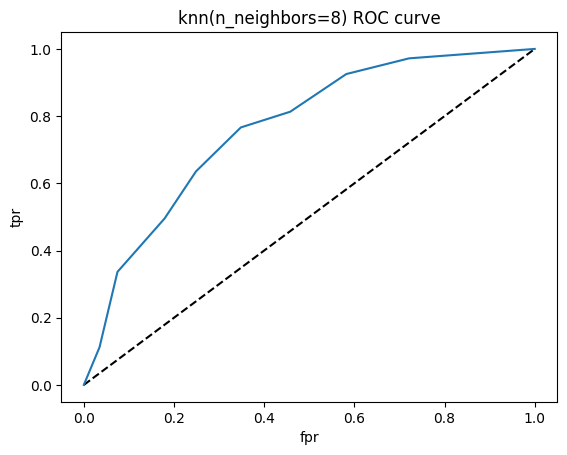

In [107]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbors=8) ROC curve')
plt.show()